# Find best parameters for time series classification using CNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Import_functions as Imp_funct
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

## Data analysis

### Accelerometric data spectrum

Load data coming from a 3-axes accelerometer attached to a motor. The aim of this study it to classify the time series acceleration data in four classes:
- Slow
- Fast
- Slow with disturbance
- Fast with disturbance 

Data have been collected using the highest available sampling frequency of 6667 Hz.
It is possible to study the classification problem considering also lower sampling frequency adjusting the Resampling_frequency parameter with one of the following frequency values corresponding to the available STWIN output data rate:
- 12.5
- 26
- 52
- 104
- 208
- 416
- 833
- 1667
- 3332
- 6667


Moreover as the spectrum has been calculated considering the welch method a number of spectrum averages must be choosen.

Measured ODR: 6917.174621034457

ODR after resampling: 6666.999999999998


Text(0.5, 0, 'Frequency [Hz]')

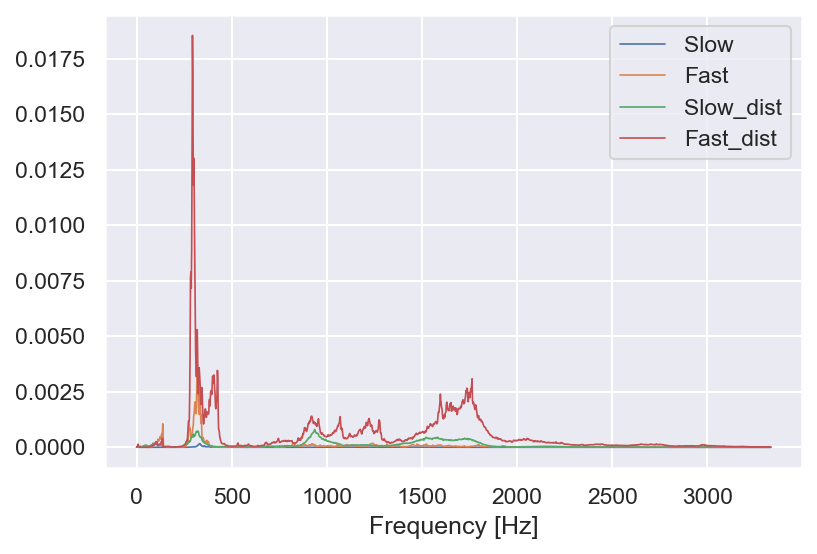

In [2]:
# The user must choose these parameters
Resampling_frequency = 6667
number_of_averages=500
Accelerometer_axis = 'x'

# Load acceleration data
df_ACC_S, df_ACC_F, df_ACC_SD, df_ACC_FD = Imp_funct.load_data(resampling_active=True, Resampling_frequency=Resampling_frequency)

# Spectrum calculation
freq_S, P_spectr_S = Imp_funct.signal_welch(df_ACC_S, sensor_Type='A_'+Accelerometer_axis+' [g]', n_avg = number_of_averages)
freq_F, P_spectr_F = Imp_funct.signal_welch(df_ACC_F, sensor_Type='A_'+Accelerometer_axis+' [g]', n_avg = number_of_averages)
freq_SD, P_spectr_SD = Imp_funct.signal_welch(df_ACC_SD, sensor_Type='A_'+Accelerometer_axis+' [g]', n_avg = number_of_averages)
freq_FD, P_spectr_FD = Imp_funct.signal_welch(df_ACC_FD, sensor_Type='A_'+Accelerometer_axis+' [g]', n_avg = number_of_averages)

plt.figure(dpi=150)
plt.plot(freq_S, P_spectr_S, linewidth=0.8)
plt.plot(freq_F, P_spectr_F, linewidth=0.8)
plt.plot(freq_SD, P_spectr_SD, linewidth=0.8)
plt.plot(freq_FD, P_spectr_FD, linewidth=0.8)
plt.legend(['Slow','Fast', 'Slow_dist','Fast_dist'])
plt.xlabel('Frequency [Hz]')

## Statistical distribution of the acceleration data

These plots have been used to check the statistical distribution of the signal, often it is important that the distribution shape is closer to a Gaussian Distribution, if not some data transformation techniques can be used 


### Global time series distribution of all the signals

100%|██████████| 32034/32034 [00:07<00:00, 4049.30it/s]


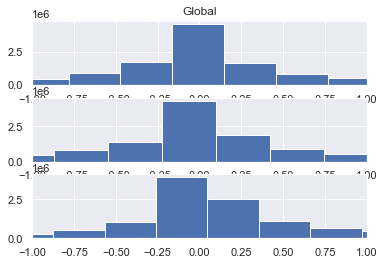

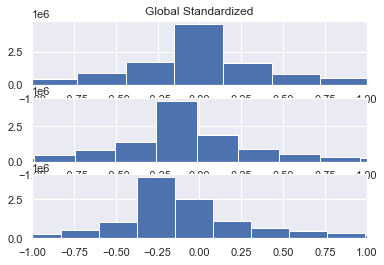

In [3]:
# User input parameters
window_length=100           # n_samples choosen as a window
sliding_samples=50          # number of sliding samples between two windows

# Prepare dataset for CNN 
X_S = Imp_funct.CNN_time_series_sorting_input_matrix(df_ACC_S, sliding_samples ,window_length)
X_SD = Imp_funct.CNN_time_series_sorting_input_matrix(df_ACC_F, sliding_samples ,window_length)
X_F = Imp_funct.CNN_time_series_sorting_input_matrix(df_ACC_SD, sliding_samples ,window_length)
X_FD = Imp_funct.CNN_time_series_sorting_input_matrix(df_ACC_FD, sliding_samples ,window_length)

X = np.concatenate((X_S,X_F,X_SD,X_FD),axis=0)

# Calculation of the distribution
Imp_funct.plot_variable_distributions(X[:,:,:,0],title='Global')
X = Imp_funct.scale_data(X, standardize=True)
Imp_funct.plot_variable_distributions(X[:,:,:,0], title = 'Global Standardized')

### Time series distribution for each class

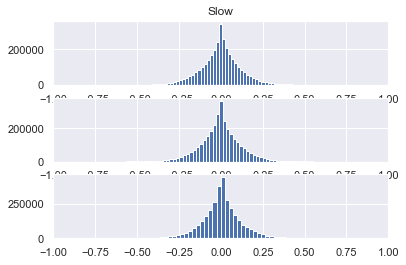

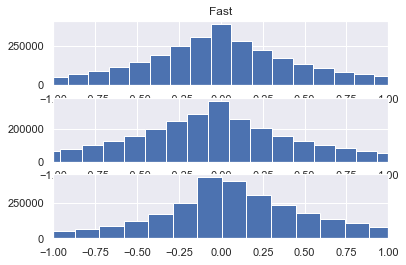

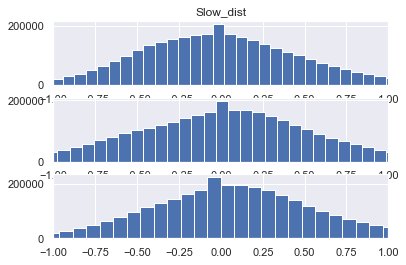

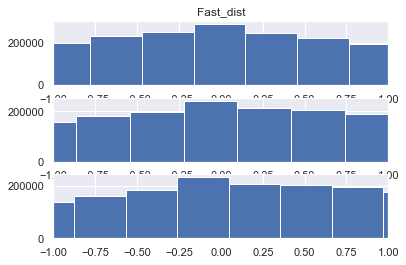

In [4]:
# DISTRIBUTION PER CLASS
Imp_funct.plot_variable_distributions(X_S[:,:,:,0],title= 'Slow')
Imp_funct.plot_variable_distributions(X_F[:,:,:,0],title= 'Fast')
Imp_funct.plot_variable_distributions(X_SD[:,:,:,0], title = 'Slow_dist')
Imp_funct.plot_variable_distributions(X_FD[:,:,:,0], title = 'Fast_dist')

## CNN Test accuracy for different parameters 

The run_experiment function can be setted up by the user depending on which experiemt is required. It is possible to change one parameter for each experiments and repeat the traing and test different times in order to have resonable statistical results on the model accuracy.

###  #1 Accuracy test changing the window length
In this example the window length is the variable parameter "p"

The user can set the following paramters:
- Resampling_frequency between (12.5 , 52 , 104 , 208 , 416 , 833 , 1667 , 3332 , 6667)
- Sliding_samples
- Number of repetitions
- Model architecture and kernel size
- learning rate
- batch size


- window_length (variable parameters) = 50, 100, 200, 400, 800


Measured ODR: 6917.174621034457

ODR after resampling: 1667.0000000000002


100%|██████████| 2003/2003 [00:00<00:00, 4129.91it/s]
C:\Users\diego\AppData\Roaming\Python\Python39\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


>parameter = 50 #1: 97.441
>parameter = 50 #2: 97.441
>parameter = 50 #3: 98.065
>parameter = 50 #4: 97.441
>parameter = 50 #5: 97.441


100%|██████████| 1002/1002 [00:00<00:00, 4024.11it/s]
C:\Users\diego\AppData\Roaming\Python\Python39\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


>parameter = 100 #1: 97.506
>parameter = 100 #2: 97.382
>parameter = 100 #3: 97.382
>parameter = 100 #4: 97.257
>parameter = 100 #5: 97.257


100%|██████████| 501/501 [00:00<00:00, 3853.74it/s]
C:\Users\diego\AppData\Roaming\Python\Python39\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


>parameter = 200 #1: 95.012
>parameter = 200 #2: 93.017
>parameter = 200 #3: 94.015
>parameter = 200 #4: 94.015
>parameter = 200 #5: 95.012


100%|██████████| 251/251 [00:00<00:00, 3302.66it/s]
C:\Users\diego\AppData\Roaming\Python\Python39\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


>parameter = 400 #1: 96.517
>parameter = 400 #2: 95.025
>parameter = 400 #3: 95.025
>parameter = 400 #4: 93.035
>parameter = 400 #5: 95.522


100%|██████████| 125/125 [00:00<00:00, 2777.88it/s]
C:\Users\diego\AppData\Roaming\Python\Python39\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


>parameter = 800 #1: 88.000
>parameter = 800 #2: 81.000
>parameter = 800 #3: 90.000
>parameter = 800 #4: 81.000
>parameter = 800 #5: 80.000
Param=50: 97.566% (+/-0.250)
Param=100: 97.357% (+/-0.093)
Param=200: 94.214% (+/-0.746)
Param=400: 95.025% (+/-1.135)
Param=800: 84.000% (+/-4.147)


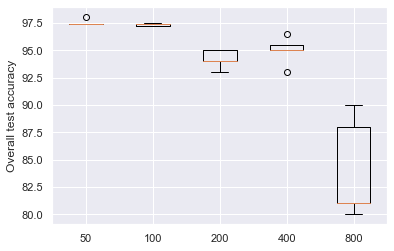

In [5]:
def run_experiment(params, repeats):
    
    # Choose the resampling frequency 
    Resampling_frequency = 1667
    df_ACC_S, df_ACC_F, df_ACC_SD, df_ACC_FD = Imp_funct.load_data(resampling_active=True, Resampling_frequency=Resampling_frequency)    
    all_scores = np.zeros((len(params),repeats))
    ii=0

    for p in params:
        
        window_length=p   # Number of samples considered in the window
        sliding_samples=int(window_length*4)   # Overlapped samples in this case half of the window length
    
        X_S = Imp_funct.CNN_time_series_sorting_input_matrix(df_ACC_S, sliding_samples ,window_length)
        X_SD = Imp_funct.CNN_time_series_sorting_input_matrix(df_ACC_F, sliding_samples ,window_length)
        X_F = Imp_funct.CNN_time_series_sorting_input_matrix(df_ACC_SD, sliding_samples ,window_length)
        X_FD = Imp_funct.CNN_time_series_sorting_input_matrix(df_ACC_FD, sliding_samples ,window_length)
    
        y_S = np.ones(len(X_S))*0
        y_F = np.ones(len(X_F))*1
        y_SD = np.ones(len(X_SD))*2
        y_FD = np.ones(len(X_FD))*3
        
        X = np.concatenate((X_S,X_F,X_SD,X_FD),axis=0)
        y = np.concatenate((y_S,y_F,y_SD,y_FD),axis=0)
        
        # Data randomization
        idx = np.random.permutation(len(X))
        X = X[idx]
        y=y[idx]
    
        # Binarization of categorical labels
        # From a single vector containing the class number from 0 to 4 
        # To a matrix of dimension len(y) and 4 columns cotaining 0 or 1 based for each label
        lb.fit(y)
        y=lb.transform(y)
        
        # train/test split
        trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=1)
        trainX, validationX, trainY, validationY = train_test_split(trainX, trainY, test_size=0.25, random_state=1)

        for r in range(repeats):
            
            outputShape=trainY.shape[1]
            model = tf.keras.models.Sequential([ 
                tf.keras.layers.Conv2D( trainX.shape[ 1 ], ( 5, 1 ), input_shape = ( trainX.shape[ 1 ], trainX.shape[ 2 ],trainX.shape[ 3 ] ), activation = 'relu' ),
                tf.keras.layers.MaxPooling2D( pool_size = ( 3, 1 ) ),
                tf.keras.layers.Flatten( ),
                tf.keras.layers.Dense( 12 ),
                tf.keras.layers.Dense( 12 ),
                tf.keras.layers.Dropout( 0.5 ),
                tf.keras.layers.Dense( outputShape, activation = 'softmax' ) 
                ])
            
            # the user can change the learning rate and the batch size
            # early stopping on val_loss has been applied
            learningRate = 3e-3
            batchSize = 128
            
            _, score = Imp_funct.evaluate_model(trainX, trainY ,
                                             validationX, validationY, 
                                             testX, testY, 
                                             model,
                                             learningRate = learningRate,
                                             batchSize = batchSize,
                                             verbosity = 0)
            
            score = score * 100.0
            print('>parameter = %s #%d: %.3f' % (p, r+1, score))
            all_scores[ii,r]=score
        ii +=1
    all_scores = all_scores.tolist()
    Imp_funct.summarize_results(all_scores, params)
    return all_scores


# Run the function
params=np.array([ 50, 100, 200, 400, 800])
all_scores = run_experiment(params, repeats=5)

###  #2 Accuracy test changing the convolution kernel size
In this example the convolutional kernel size is the variable parameter "p"

The user can set the following paramters:
- Resampling_frequency between (12.5 , 52 , 104 , 208 , 416 , 833 , 1667 , 3332 , 6667)
- Sliding_samples
- Number of repetitions
- Model architecture 
- learning rate
- batch size
- window_length 


- kernel size (variable parameters) = 2 , 3 , 5 , 10


Measured ODR: 6917.174621034457

ODR after resampling: 1667.0000000000002


100%|██████████| 5007/5007 [00:01<00:00, 4218.00it/s]
C:\Users\diego\AppData\Roaming\Python\Python39\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


>parameter = 2 #1: 90.362
>parameter = 2 #2: 91.935
>parameter = 2 #3: 91.386
>parameter = 2 #4: 91.236
>parameter = 2 #5: 91.985


100%|██████████| 5007/5007 [00:01<00:00, 4182.96it/s]
C:\Users\diego\AppData\Roaming\Python\Python39\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


>parameter = 3 #1: 93.733
>parameter = 3 #2: 93.683
>parameter = 3 #3: 93.233
>parameter = 3 #4: 93.758
>parameter = 3 #5: 93.983


100%|██████████| 5007/5007 [00:01<00:00, 4228.89it/s]
C:\Users\diego\AppData\Roaming\Python\Python39\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


>parameter = 5 #1: 96.130
>parameter = 5 #2: 95.406
>parameter = 5 #3: 95.581
>parameter = 5 #4: 95.655
>parameter = 5 #5: 95.231


100%|██████████| 5007/5007 [00:01<00:00, 4189.96it/s]
C:\Users\diego\AppData\Roaming\Python\Python39\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


>parameter = 10 #1: 95.855
>parameter = 10 #2: 96.654
>parameter = 10 #3: 96.404
>parameter = 10 #4: 96.155
>parameter = 10 #5: 96.305
Param=2: 91.381% (+/-0.588)
Param=3: 93.678% (+/-0.245)
Param=5: 95.601% (+/-0.303)
Param=10: 96.275% (+/-0.265)


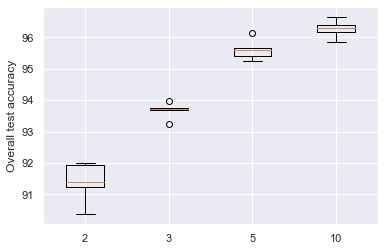

In [6]:
def run_experiment(params, repeats):
    # Choose the resampling frequency 
    Resampling_frequency = 1667
    df_ACC_S, df_ACC_F, df_ACC_SD, df_ACC_FD = Imp_funct.load_data(resampling_active=True, Resampling_frequency=Resampling_frequency)
    
    all_scores = np.zeros((len(params),repeats))
    ii=0

    for p in params:
        
        window_length=20   # Number of samples considered in the window
        sliding_samples=int(window_length*4)   # Overlapped samples in this case half of the window length
    
        X_S = Imp_funct.CNN_time_series_sorting_input_matrix(df_ACC_S, sliding_samples ,window_length)
        X_SD = Imp_funct.CNN_time_series_sorting_input_matrix(df_ACC_F, sliding_samples ,window_length)
        X_F = Imp_funct.CNN_time_series_sorting_input_matrix(df_ACC_SD, sliding_samples ,window_length)
        X_FD = Imp_funct.CNN_time_series_sorting_input_matrix(df_ACC_FD, sliding_samples ,window_length)
    
        y_S = np.ones(len(X_S))*0
        y_F = np.ones(len(X_F))*1
        y_SD = np.ones(len(X_SD))*2
        y_FD = np.ones(len(X_FD))*3
        
        X = np.concatenate((X_S,X_F,X_SD,X_FD),axis=0)
        y = np.concatenate((y_S,y_F,y_SD,y_FD),axis=0)
        
        # Data randomization
        idx = np.random.permutation(len(X))
        X = X[idx]
        y=y[idx]
    
        # Binarization of categorical labels
        # From a single vector containing the class number from 0 to 4 
        # To a matrix of dimension len(y) and 4 columns cotaining 0 or 1 based for each label
        lb.fit(y)
        y=lb.transform(y)
        
        # train/test split
        trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=1)
        trainX, validationX, trainY, validationY = train_test_split(trainX, trainY, test_size=0.25, random_state=1)

        for r in range(repeats):
            
            outputShape=trainY.shape[1]
            model = tf.keras.models.Sequential([ 
                tf.keras.layers.Conv2D( trainX.shape[ 1 ], ( p, 1 ), input_shape = ( trainX.shape[ 1 ], trainX.shape[ 2 ],trainX.shape[ 3 ] ), activation = 'relu' ),
                tf.keras.layers.MaxPooling2D( pool_size = ( 2, 1 ) ),
                tf.keras.layers.Flatten( ),
                tf.keras.layers.Dense( 12 ),
                tf.keras.layers.Dense( 12 ),
                tf.keras.layers.Dropout( 0.5 ),
                tf.keras.layers.Dense( outputShape, activation = 'softmax' ) 
                ])
            
            # the user can change the learning rate and the batch size
            learningRate = 3e-3
            batchSize = 128
            
            _, score = Imp_funct.evaluate_model(trainX, trainY ,
                                             validationX, validationY, 
                                             testX, testY, 
                                             model,
                                             learningRate = learningRate,
                                             batchSize = batchSize,
                                             verbosity = 0)
            
            score = score * 100.0
            print('>parameter = %s #%d: %.3f' % (p, r+1, score))
            all_scores[ii,r]=score
            del model 
        ii +=1
    all_scores = all_scores.tolist()
    Imp_funct.summarize_results(all_scores, params)
    return all_scores


# Run the function
params=np.array([ 2, 3, 5 , 10])
all_scores = run_experiment(params, repeats=5)

###  #3 Accuracy test changing the CNN model 
In this example two different model architectures have been tested

The user can set the following paramters:
- Resampling_frequency between (12.5 , 52 , 104 , 208 , 416 , 833 , 1667 , 3332 , 6667)
- Sliding_samples
- Number of repetitions
- learning rate
- batch size
- window_length 


- Model architecture : p = 1 (model type 1),  p = 2 (model type 2)

Measured ODR: 6917.174621034457

ODR after resampling: 1667.0000000000002


100%|██████████| 1002/1002 [00:00<00:00, 4123.49it/s]
C:\Users\diego\AppData\Roaming\Python\Python39\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


>parameter = 1 #1: 96.384
>parameter = 1 #2: 97.007
>parameter = 1 #3: 96.509
>parameter = 1 #4: 96.633
>parameter = 1 #5: 97.132


100%|██████████| 1002/1002 [00:00<00:00, 4040.40it/s]
C:\Users\diego\AppData\Roaming\Python\Python39\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


>parameter = 2 #1: 41.147
>parameter = 2 #2: 39.027
>parameter = 2 #3: 38.030
>parameter = 2 #4: 39.277
>parameter = 2 #5: 39.651
Param=1: 96.733% (+/-0.289)
Param=2: 39.426% (+/-1.014)


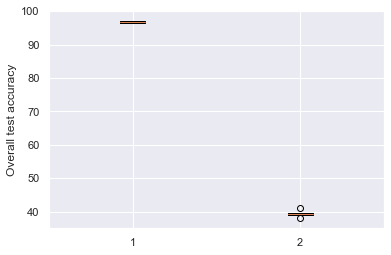

In [7]:
def run_experiment(params, repeats):
    # LOAD DATA & RESAMPLING
    Resampling_frequency = 1667
    df_ACC_S, df_ACC_F, df_ACC_SD, df_ACC_FD = Imp_funct.load_data(resampling_active=True, Resampling_frequency=Resampling_frequency)
    
    all_scores = np.zeros((len(params),repeats))
    ii=0
    # Prepare data for the CNN
    for p in params:
        
        window_length=100   # Number of samples considered in the window
        sliding_samples=int(window_length*4)   # Overlapped samples in this case half of the window length
    
        X_S = Imp_funct.CNN_time_series_sorting_input_matrix(df_ACC_S, sliding_samples ,window_length)
        X_SD = Imp_funct.CNN_time_series_sorting_input_matrix(df_ACC_F, sliding_samples ,window_length)
        X_F = Imp_funct.CNN_time_series_sorting_input_matrix(df_ACC_SD, sliding_samples ,window_length)
        X_FD = Imp_funct.CNN_time_series_sorting_input_matrix(df_ACC_FD, sliding_samples ,window_length)
    
        y_S = np.ones(len(X_S))*0
        y_F = np.ones(len(X_F))*1
        y_SD = np.ones(len(X_SD))*2
        y_FD = np.ones(len(X_FD))*3
        
        X = np.concatenate((X_S,X_F,X_SD,X_FD),axis=0)
        y = np.concatenate((y_S,y_F,y_SD,y_FD),axis=0)
        
        # Data randomization
        idx = np.random.permutation(len(X))
        X = X[idx]
        y=y[idx]
    
        # Binarization of categorical labels
        # From a single vector containing the class number from 0 to 4 
        # To a matrix of dimension len(y) and 4 columns cotaining 0 or 1 based for each label
        lb.fit(y)
        y=lb.transform(y)
        
        # train/test split
        trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=1)
        trainX, validationX, trainY, validationY = train_test_split(trainX, trainY, test_size=0.25, random_state=1)

        for r in range(repeats):
            
            outputShape=trainY.shape[1]
            if p == 1:
                model = tf.keras.models.Sequential([ 
                        tf.keras.layers.Conv2D( trainX.shape[ 1 ], ( 5, 1 ), input_shape = ( trainX.shape[ 1 ], trainX.shape[ 2 ],trainX.shape[ 3 ] ), activation = 'relu' ),
                        tf.keras.layers.MaxPooling2D( pool_size = ( 3, 1 ) ),
                        tf.keras.layers.Flatten( ),
                        tf.keras.layers.Dense( 12 ),
                        tf.keras.layers.Dense( 12 ),
                        tf.keras.layers.Dropout( 0.5 ),
                        tf.keras.layers.Dense( outputShape, activation = 'softmax' )])
            
            elif p==2:
                model = tf.keras.models.Sequential([ 
                        tf.keras.layers.Conv2D( 64, (5,1) , input_shape = (  X.shape[ 1 ], X.shape[ 2 ], X.shape[ 3 ] ), activation = 'relu',padding='same', strides=1),
                        tf.keras.layers.BatchNormalization(),
                        tf.keras.layers.Conv2D(32, (5,1), activation='relu',padding='same',strides=5),
                        tf.keras.layers.BatchNormalization(),
                        tf.keras.layers.Conv2D(64, (2,1) , activation='relu',padding='same',strides=5),
                        tf.keras.layers.BatchNormalization(),
                        tf.keras.layers.Conv2D(32, (3,1) , activation='relu',padding='same',strides=2),
                        tf.keras.layers.BatchNormalization(),
                        tf.keras.layers.Conv2D(32, (3,1) , activation='relu',padding='same',strides=2),
                        tf.keras.layers.BatchNormalization(),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(512,activation='relu'), 
                        tf.keras.layers.Dropout(0.2),
                        tf.keras.layers.Dense( outputShape ,activation = 'softmax')])
            
            
            learningRate = 3e-3
            batchSize = 128
            
            _, score = Imp_funct.evaluate_model(trainX, trainY ,
                                             validationX, validationY, 
                                             testX, testY, 
                                             model,
                                             learningRate = learningRate,
                                             batchSize = batchSize,
                                             verbosity = 0)
            
            score = score * 100.0
            print('>parameter = %s #%d: %.3f' % (p, r+1, score))
            all_scores[ii,r]=score

            del model 
        ii +=1
    all_scores = all_scores.tolist()
    Imp_funct.summarize_results(all_scores, params)
    return all_scores


# Run the function
params=np.array([ 1, 2])
all_scores = run_experiment(params, repeats=5)